In [1]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 20e6 # 20MHz

# generate white noise

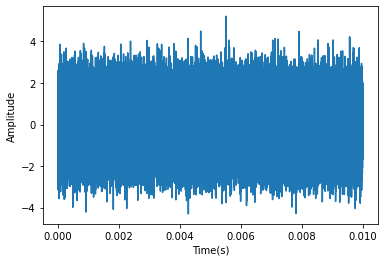

In [2]:
sample_rate = 20e6
def generate_white_noise(sample_rate = 20e6, duration = 0.01, mean =0, std = 1):
  x = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
  num_samples = len(x)
  y = np.random.normal(mean, std, size=num_samples*2).view(np.complex128) 
  return x, y, num_samples

x, y, N= generate_white_noise(sample_rate)


def plot_signal(x,y):
  plt.plot(x, y)
  plt.ylabel('Amplitude')
  plt.xlabel('Time(s)')
  plt.show()

plot_signal(x,y)

200000 200000


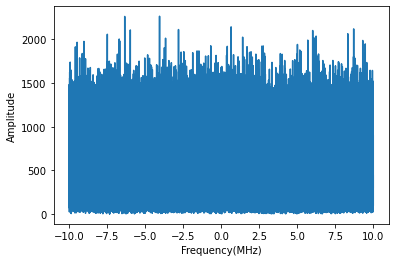

In [3]:
# check spec
from scipy.fft import fft, fftfreq

def plot_spec(x, y):
  yf = fft(y)
  print(N, len(y))
  xf = fftfreq(N, 1 / sample_rate)/1e6

  plt.plot(xf, np.abs(yf))
  plt.ylabel('Amplitude')
  plt.xlabel('Frequency(MHz)')
  plt.show()

plot_spec(x, y)


Obtain a narrow band signal by applying low-pass filter

200000 200000


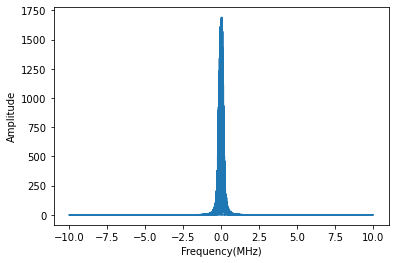

In [5]:
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=2):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=2):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

ofdm_freq_spacing = 312.5e3/2
highcut = ofdm_freq_spacing * 1

filtered_y = butter_lowpass_filter(y, highcut, sample_rate, order=3)

plot_spec(x, filtered_y)

In [24]:
np.save('./signal_set_52subcarriers/base.npy', filtered_y)

# Generate sinewave to shift the white noise

200000 200000


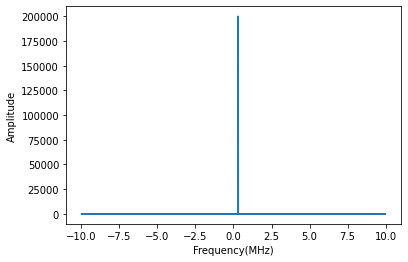

200000 200000


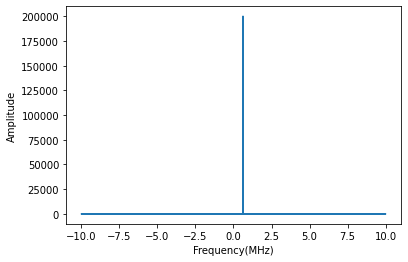

200000 200000


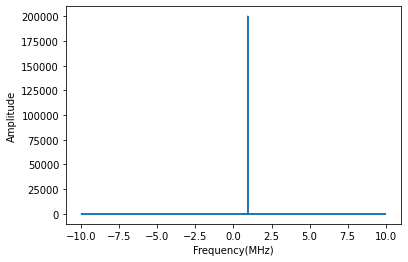

200000 200000


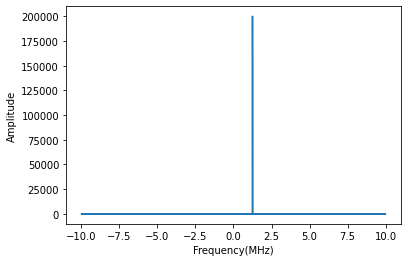

200000 200000


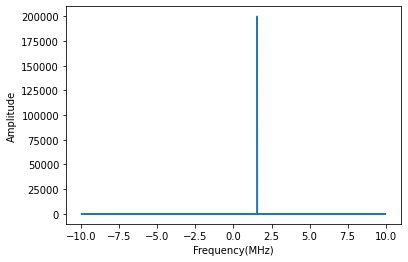

200000 200000


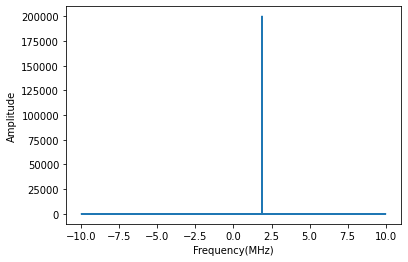

200000 200000


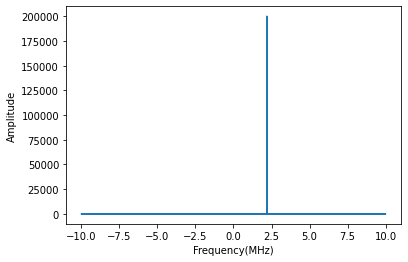

200000 200000


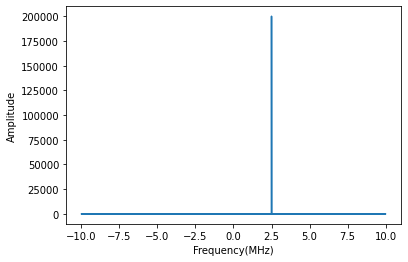

200000 200000


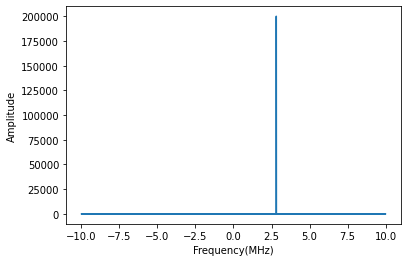

200000 200000


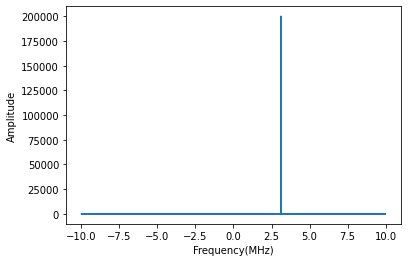

200000 200000


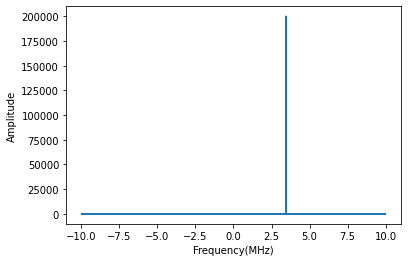

200000 200000


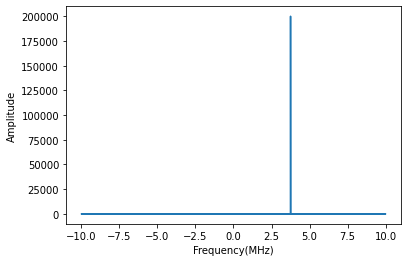

200000 200000


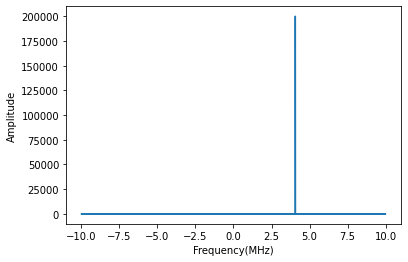

200000 200000


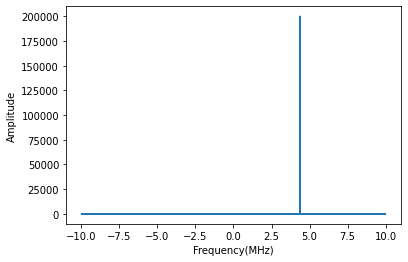

200000 200000


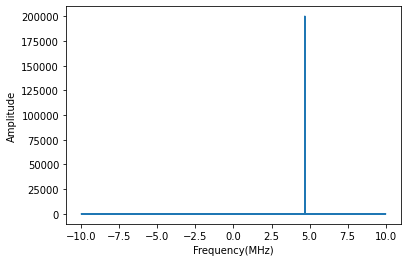

200000 200000


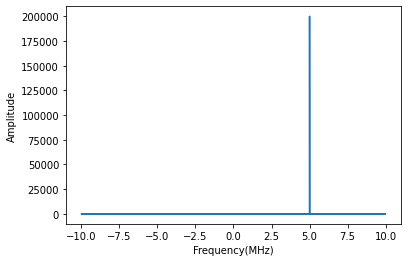

200000 200000


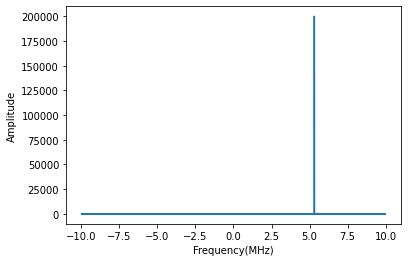

200000 200000


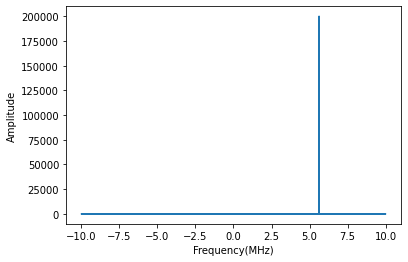

200000 200000


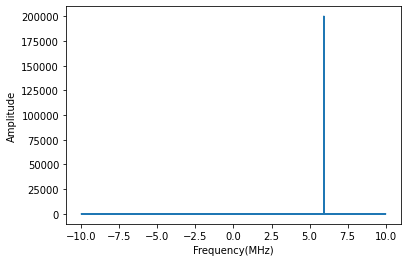

200000 200000


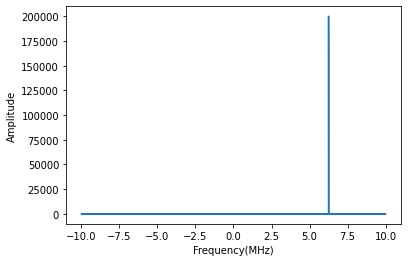

200000 200000


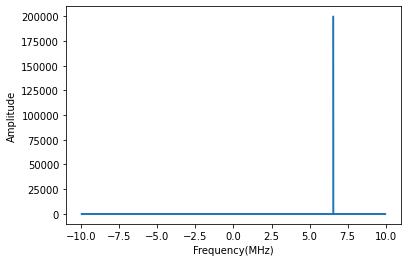

200000 200000


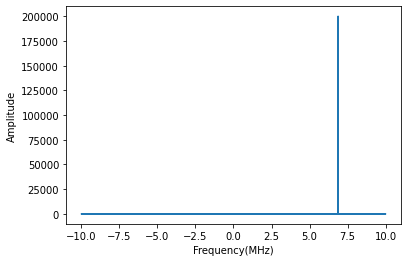

200000 200000


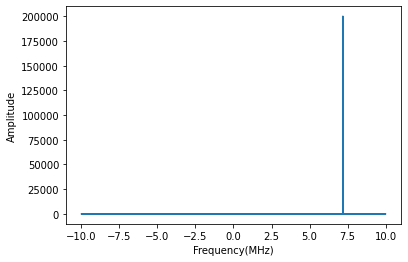

200000 200000


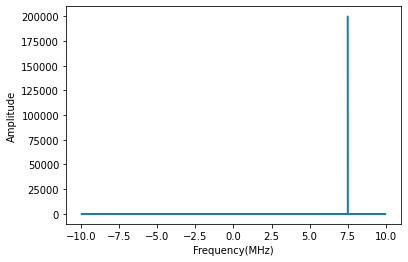

200000 200000


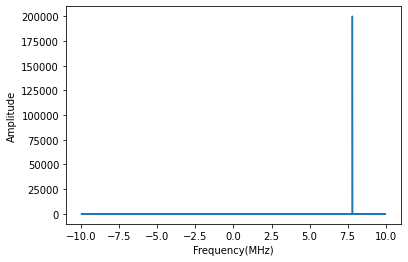

200000 200000


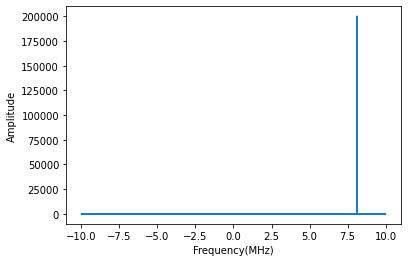

200000 200000


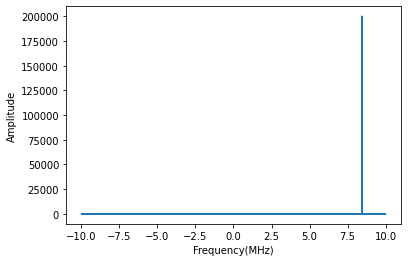

200000 200000


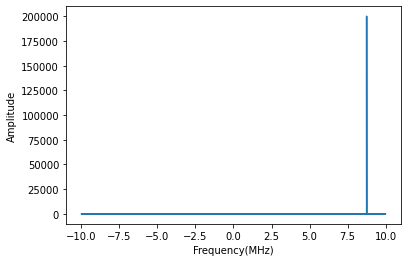

In [25]:
def generate_sine_wave(freq = 312.5e3*1, sample_rate = 20e6, duration =0.01, amp = 1):
    x = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    k = 2*np.pi*freq*x
    sine_wave = amp * np.exp(1j* k)
    return x, sine_wave

x, sine_wave = generate_sine_wave()

for i in range(1, 29):
    x, sine_wave = generate_sine_wave(freq = 312.5e3*i)
    plot_spec(x, sine_wave)
    np.save('./signal_set_52subcarriers/sine_{}.npy'.format(i), sine_wave)

    